# Perceptual Beat Estimator Test Procedure

#### Import required functions

In [20]:
from midi_utils import midi2string, tick2second
from PerceptualBeatEstimator import PerceptualBeatEstimator
from mido import MidiFile
import os
import numpy as np
import matplotlib.pyplot as plt
from PbeTester import PbeTester

### Latency testing (what is the best value of latency correction?)
There is a delay between the drum being hit and bonk detecting an onset.
We must account for this delay by subtracting some amount from the onset times.
Begin by trying latency corrections between 0 and 30ms (inclusive).

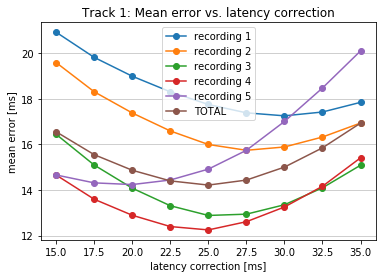

In [29]:
test_dir = 'test_sets/set_1/'
latency_params = (np.arange(15/1000, 35/1000, 2.5/1000)) # 0 - 30ms in steps of 5ms

for file in os.listdir(os.fsencode(test_dir)): # loop through all midi files in the test set folder
    filename = os.fsdecode(file)
    
    if filename.endswith('.mid'):
        test = MidiFile(test_dir + filename)
        
        for i, track in enumerate(test.tracks):  # loop through each track in the midi file
            
            arr_stdDev = []
            arr_arr_errors = []
            for delta_latency in latency_params:
                # 1. create a new PbeTester object
                pbeTester = PbeTester(track, ticks_per_beat=test.ticks_per_beat, delta_latency=delta_latency)

                # 2. get arrays of error times
                arr_errors = pbeTester.getErrors()
                
                # 3. Record standard deviation and highest error (in ms) for each recording in the midi track
                if not arr_stdDev:
                    arr_stdDev = [[] for _ in arr_errors]
                    arr_mean = [[] for _ in arr_errors]
                    arr_errorHigh = [[] for _ in arr_errors]
                for j, errors in enumerate(arr_errors):
                    arr_stdDev[j].append(np.std(errors))
                    arr_mean[j].append(np.mean(np.abs(np.array(errors))))
                    arr_errorHigh[j].append(errors[np.argmax(np.abs(np.array(errors)))])
                
                # list of lists of lists. at each index, the list is of the errors for that parameter
                arr_arr_errors.append(arr_errors)
                
            
            # plot mean error vs. delta_latency
            
            plt.figure()
            plt.title(f'Track {i+1}: Mean error vs. latency correction')
            plt.xlabel('latency correction [ms]')
            plt.ylabel('mean error [ms]')
            plt.grid(axis='y', alpha=0.75)
            for j, mean in enumerate(arr_mean):
                plt.plot(np.array(latency_params)*1000, np.array(mean)*1000, '-o', label=f'recording {j+1}')
            
            # plot the total
            total_mean = []
            for arr_errors in arr_arr_errors:
                arr_errors_flat = [item for sublist in arr_errors for item in sublist]
                total_mean.append(np.mean(np.abs(arr_errors_flat)))

            plt.plot(np.array(latency_params)*1000, np.array(total_mean)*1000, '-o', label='TOTAL')
            
            plt.legend(loc='best')
            plt.show()
            
        

### BP window width testing (what is the optimal BP window width?)
Now that we know the best value of latency correction, we can use that value and look at other parameters.

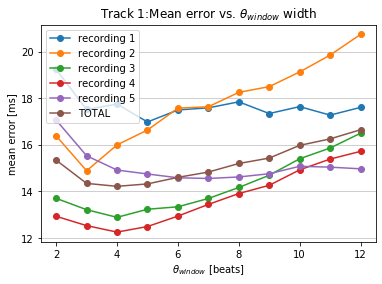

In [32]:
test_dir = 'test_sets/set_1/'
BP_window_params = range(2,13)

for file in os.listdir(os.fsencode(test_dir)): # loop through all midi files in the test set folder
    filename = os.fsdecode(file)
    
    if filename.endswith('.mid'):
        test = MidiFile(test_dir + filename)
        
        for i, track in enumerate(test.tracks):  # loop through each track in the midi file
            
            arr_stdDev = []
            arr_arr_errors = []
            for BP_window in BP_window_params:
                # 1. create a new PbeTester object
                pbeTester = PbeTester(track, delta_latency=0.025, BP_window=BP_window)

                # 2. get arrays of error times
                arr_errors = pbeTester.getErrors()
                
                # 3. Record standard deviation and highest error (in ms) for each recording in the midi track
                if not arr_stdDev:
                    arr_stdDev = [[] for _ in arr_errors]
                    arr_mean = [[] for _ in arr_errors]
                    arr_errorHigh = [[] for _ in arr_errors]
                for j, errors in enumerate(arr_errors):
                    arr_stdDev[j].append(np.std(errors))
                    arr_mean[j].append(np.mean(np.abs(np.array(errors))))
                    arr_errorHigh[j].append(errors[np.argmax(np.abs(np.array(errors)))])
                
                # list of lists of lists. at each index, the list is of the errors for that parameter
                arr_arr_errors.append(arr_errors)
                
            
            # plot mean error vs. BP window width
            
            plt.figure()
            plt.title(f'Track {i+1}:' + r'Mean error vs. $\theta_{window}$ width')
            plt.xlabel(r'$\theta_{window}$ [beats]')
            plt.ylabel('mean error [ms]')
            plt.grid(axis='y', alpha=0.75)
            for j, mean in enumerate(arr_mean):
                plt.plot(BP_window_params, np.array(mean)*1000, '-o', label=f'recording {j+1}')
            
            # plot the total
            total_mean = []
            for arr_errors in arr_arr_errors:
                arr_errors_flat = [item for sublist in arr_errors for item in sublist]
                total_mean.append(np.mean(np.abs(arr_errors_flat)))

            plt.plot(BP_window_params, np.array(total_mean)*1000, '-o', label='TOTAL')
            
            plt.legend(loc='best')
            plt.show()